In [1]:
import pandas as pd
import numpy as np
data_actual= pd.read_csv("C:/Users/harsh/Downloads/character-predictions (1).csv")

In [2]:
data_actual.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [3]:
def preprocess(data):
    death_preds = data
    death_preds.loc[:, "culture"] = pd.factorize(death_preds.culture)[0]
    death_preds.loc[:, "title"] = pd.factorize(death_preds.title)[0]
    death_preds.loc[:, "culture"] = pd.factorize(death_preds.culture)[0]
    death_preds.loc[:, "mother"] = pd.factorize(death_preds.mother)[0]
    death_preds.loc[:, "father"] = pd.factorize(death_preds.father)[0]
    death_preds.loc[:, "heir"] = pd.factorize(death_preds.heir)[0]
    death_preds.loc[:, "house"] = pd.factorize(death_preds.house)[0]
    death_preds.loc[:, "spouse"] = pd.factorize(death_preds.spouse)[0]

    death_preds.drop(["name", "alive", "pred", "plod", "isAlive"], 1, inplace = True)
    death_preds = death_preds.drop(['S.No'],1)
    death_preds = death_preds.drop(['DateoFdeath'],1)
    death_preds.fillna(value = -1, inplace = True)
    return death_preds


In [4]:
death_preds_p = preprocess(data_actual)
Y = pd.DataFrame

In [36]:
X = death_preds_p[death_preds_p.actual == 0].sample(350, random_state = 62).append(death_preds_p[death_preds_p.actual == 1].sample(350, random_state = 62)).copy(deep = True).astype(np.float64)
Y = pd.DataFrame(X['actual'])
tX = death_preds_p[~death_preds_p.index.isin(X.index)].copy(deep = True).astype(np.float64)
tY = tX.actual.values
X.drop([ "actual"], 1, inplace = True)
tX.drop(["actual"], 1, inplace = True)


In [37]:
Y.head()

,actual
456,0.0
1921,0.0
1650,0.0
1547,0.0
1829,0.0


In [10]:
from random import sample
import sklearn
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score
import sys

#These all need to be installed to both run and visualize a tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline



In [11]:
def split_data(data_for_split):
    l = len(data_for_split)
    train_per = l*.80
    test_per = l*.20

    train_df= data_for_split.sample(frac=0.8 , replace = False )
    print(train_df.head())
    test_df = data_for_split.loc[~data_for_split.index.isin(train_df.index)]
    print(test_df.head())
   
    # Code here
    lab = 'actual'
    X_train =train_df.drop(lab, 1)
    y_train=train_df[lab]
    X_test=test_df.drop(lab, 1)
    y_test=test_df[lab]

    return X_train,y_train,X_test,y_test



In [12]:
#X_train_p,y_train_p,X_test_p,y_test_p = split_data(X)



In [13]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,Y)

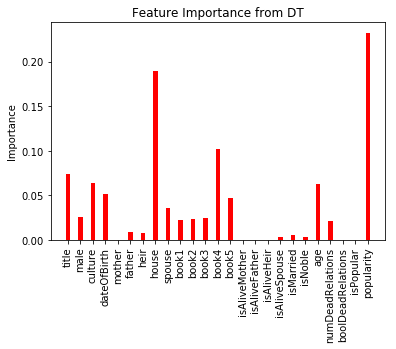

In [14]:

fig, ax = plt.subplots()
width = 0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(np.arange(25), clf.feature_importances_, width, color = 'r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(X.columns.values, rotation = 90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Importance')


In [15]:
X = X.drop(['mother','isAliveMother','isAliveHeir','isPopular'],1)
tX = tX.drop(['mother','isAliveMother','isAliveHeir','isPopular'],1)

In [16]:
X.head()

,title,male,culture,dateOfBirth,father,heir,house,spouse,book1,book2,...,book4,book5,isAliveFather,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,popularity
456,-1.0,1.0,0.0,-1.0,-1.0,-1.0,6.0,-1.0,0.0,0.0,...,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.030100
1921,-1.0,1.0,0.0,298.0,-1.0,-1.0,100.0,-1.0,1.0,1.0,...,0.0,1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.107023
1650,-1.0,0.0,0.0,155.0,-1.0,-1.0,89.0,-1.0,0.0,0.0,...,0.0,1.0,-1.0,-1.0,0.0,0.0,100.0,0.0,0.0,0.050167
1547,1.0,1.0,36.0,-1.0,-1.0,-1.0,314.0,-1.0,1.0,1.0,...,0.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.120401
1829,247.0,1.0,3.0,276.0,-1.0,-1.0,4.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,0.0,1.0,22.0,11.0,1.0,0.622074


In [17]:
#X_train_f,y_train_f,X_test_f,y_test_f = split_data(X)

In [18]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,Y)



In [19]:
print(roc_auc_score(tY, clf.predict_proba(tX)[:,1]))
cm =confusion_matrix(clf.predict(tX),tY)
print(cm)

0.729493563845
[[110 339]
 [ 35 762]]


In [21]:
def testTrees(X_train_t, y_train_t, X_test_t, y_test_t, dep, leaf, auc):
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = leaf, max_depth = dep)
    clf = clf.fit(X_train_t, y_train_t)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test_t), y_test_t)
        return (cm[0][0] + cm[1][1]) / float(sum(cm))
    else:
        return roc_auc_score(y_test_t, clf.predict_proba(X_test_t)[:,1])
    


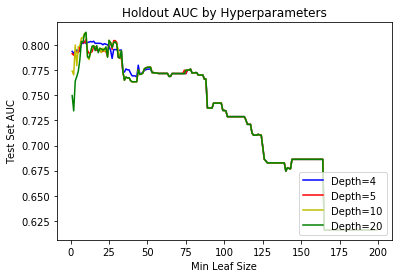

In [22]:
depths = [4, 5, 10, 20]
leaves = np.arange(1, 200)

#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res = dict()
    for d in depths:
        res[d] = list()

    #Now train and get results for each option
    for d in depths:
        for l in leaves:
            res[d].append(testTrees(X,Y,tX,tY, d, l, 1))


#Now plot            
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(leaves,res[depths[0]], 'b-', label = 'Depth={}'.format(depths[0]))
plt.plot(leaves,res[depths[1]], 'r-', label = 'Depth={}'.format(depths[1]))
plt.plot(leaves,res[depths[2]], 'y-', label = 'Depth={}'.format(depths[2]))
plt.plot(leaves,res[depths[3]], 'g-', label = 'Depth={}'.format(depths[3]))
plt.legend(loc = 4)
ax.set_xlabel('Min Leaf Size')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')

In [43]:
# as highest is depth = 20 and leafsize = 25
#lets see the confusion matrix
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 25, max_depth = 20)
clf = clf.fit(X,Y)
cm = confusion_matrix(clf.predict(tX),tY)
cm

array([[114, 345],
       [ 31, 756]])

cm = confusion_matrix(clf.predict(tX),tY)
cm
print(roc_auc_score(tY, clf.predict_proba(tX)[:,1]))

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold


lr_ = LogisticRegression(C=1,penalty='l2')
lr_.fit(X,Y)



In [49]:
cm1 = confusion_matrix(lr_.predict(tX),tY)
cm1

array([[105, 371],
       [ 40, 730]])

In [69]:

from sklearn.metrics import accuracy_score
accuracy_score(lr_.predict(tX),tY)

0.6701444622792937

sv_=svm.SVC(C=1, probability = True) 
sv_.fit(X,Y)


In [71]:
cm2 = confusion_matrix(sv_.predict(tX),tY)
cm2


array([[112, 560],
       [ 33, 541]])

In [72]:
accuracy_score(sv_.predict(tX),tY)

0.5240770465489567

In [73]:
#decision tree performs much better and thought the accuracy is somewhat similiar, our model is negative biased 

#to reduce bias we can change sampling

In [74]:
from sklearn.metrics import roc_curve, auc

def plotROC(preds, truth, label_string):
    
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

0.68220739766356597

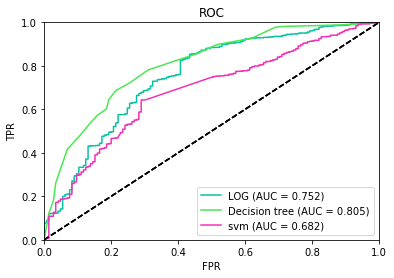

In [75]:
preds_lr = lr_.predict_proba(tX)[:, 1]
plotROC(preds_lr, tY, 'LOG')

preds_clf = clf.predict_proba(tX)[:, 1]
plotROC(preds_clf, tY, 'Decision tree')

preds_sv = sv_.predict_proba(tX)[:, 1]
plotROC(preds_sv, tY, 'svm')
